## DETECT LANE LINES IN AN IMAGE

steps
- conver to gray image
- blurr image
- detect edges (surface points) using canny
- define region of interest
- detect lines (hough transform)
- visualize

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

## READ AND SHOW THE IMAGE

300
600


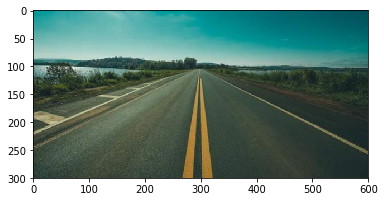

In [13]:
image_c = mpimg.imread('road.jpg')
# the plus point of reading the image via plt is the image color is not inverted in notebook

plt.imshow(image_c)  
height, width = image_c.shape[:2]
print(height)
print(width)

## CONVERT TO GRAY SCALE 

(300, 600)

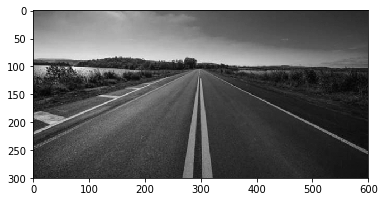

In [5]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap = 'gray')  
image_g.shape

## GAUSSIAN BLURRING AND CANNY 

# make the detection regged!

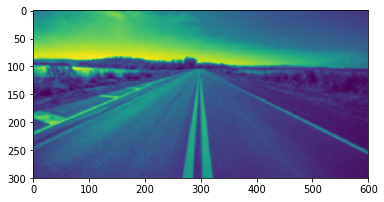

In [6]:
image_blurred = cv2.GaussianBlur(image_g, (7, 7), 0)
plt.imshow(image_blurred)  

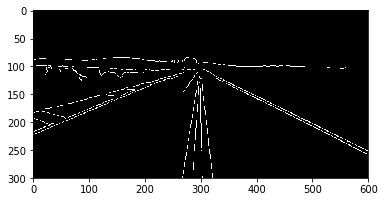

In [9]:
threshold_low = 10
threshold_high = 175

image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high)
plt.imshow(image_canny, cmap = 'gray')  

## DEFINE THE REGION OF INTEREST 

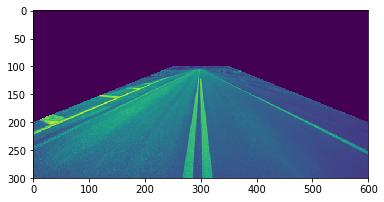

In [14]:
# Visualize the region of interest
# vertices = np.array([[(20,460),(340, 300), (460, 300), (740,460)]], dtype=np.int32)   
ROI = np.array([[(0, height),(0, height-100),(250, 100), (350, 100),(width, height-100), (width, height)]], dtype=np.int32)    

mask = np.zeros_like(image_g)   
cv2.fillPoly(mask, ROI, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

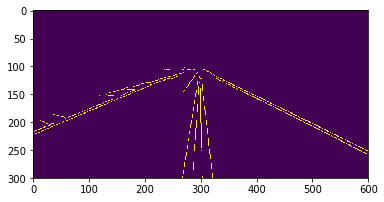

In [15]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

## HOUGH LINES DETECTION AND DRAW FUNCTION 

In [16]:
rho = 2            # distance resolution in pixels 
theta = np.pi/180  # angular resolution in radians 
threshold = 40     # minimum number of votes 
min_line_len = 100  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments    
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)
    
for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)
lines 

array([[[300, 105, 598, 250]],

       [[435, 174, 599, 257]],

       [[  1, 222, 275, 106]],

       [[286, 299, 299, 108]],

       [[302, 124, 321, 299]],

       [[267, 299, 298, 105]],

       [[ 29, 204, 270, 106]],

       [[119, 152, 297, 105]],

       [[291, 105, 484, 199]],

       [[139, 163, 287, 106]],

       [[150, 153, 272, 102]],

       [[268, 296, 294, 132]],

       [[ 66, 190, 272, 110]]], dtype=int32)

In [17]:
α = 1
β = 1
γ = 0    

# Resultant weighted image is calculated as follows: original_img * α + img * β + γ
Image_with_lines = cv2.addWeighted(image_c, α, line_image, β, γ)

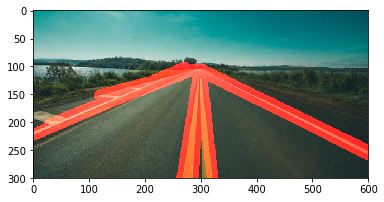

In [18]:
plt.figure()
plt.imshow(Image_with_lines)